## Setting up table for error analysis when approximating $ f(x,y,z )= x^{2y} - e^{2y + z} $ using the Halton sequence $ (\boldsymbol{x}_n)= (\phi_2(n), \phi_3(n), \phi_5(n)) $

In [6]:
import numpy as np
import pandas as pd
import sys
sys.path.append(r'/Users/cm/Documents/Python')
from Functions.qmc import *
import matplotlib.pyplot as plt

df = pd.DataFrame()

In [7]:
df['phi_2(n)'] = [brifunc(2, n+1) for n in range(1000)]
df['phi_3(n)'] = [brifunc(3, n+1) for n in range(1000)]
df['phi_5(n)'] = [brifunc(5, n+1) for n in range(1000)]

In [8]:
df.head(5)

,phi_2(n),phi_3(n),phi_5(n)
0,0.500,0.333333,0.20
1,0.250,0.666667,0.40
2,0.750,0.111111,0.60
3,0.125,0.444444,0.80
4,0.625,0.777778,0.04


In [9]:
intg = (np.log(3) - (np.exp(1) - 1) * (np.exp(2) -1)) * 0.5
f = lambda x, y,z : x**(2*y) - np.exp(2*y +z)
df['coords'] = f(df['phi_2(n)'], df['phi_3(n)'], df['phi_5(n)'])

In [10]:
df.head(5)

,phi_2(n),phi_3(n),phi_5(n),coords
0,0.500,0.333333,0.20,-1.749007
1,0.250,0.666667,0.40,-5.501997
2,0.750,0.111111,0.60,-1.337480
3,0.125,0.444444,0.80,-5.255972
4,0.625,0.777778,0.04,-4.449697


In [11]:
df['f(x)'] = df['coords']

In [12]:
df.head()

,phi_2(n),phi_3(n),phi_5(n),coords,f(x)
0,0.500,0.333333,0.20,-1.749007,-1.749007
1,0.250,0.666667,0.40,-5.501997,-5.501997
2,0.750,0.111111,0.60,-1.337480,-1.337480
3,0.125,0.444444,0.80,-5.255972,-5.255972
4,0.625,0.777778,0.04,-4.449697,-4.449697


In [13]:
df = df.drop(columns = ['coords'])

In [14]:
df.head(10)

,phi_2(n),phi_3(n),phi_5(n),f(x)
0,0.5000,0.333333,0.20,-1.749007
1,0.2500,0.666667,0.40,-5.501997
2,0.7500,0.111111,0.60,-1.337480
3,0.1250,0.444444,0.80,-5.255972
4,0.6250,0.777778,0.04,-4.449697
5,0.3750,0.222222,0.24,-1.336003
6,0.8750,0.555556,0.44,-3.854594
7,0.0625,0.888889,0.64,-11.213663
8,0.5625,0.037037,0.84,-1.536189
9,0.3125,0.370370,0.08,-1.849694


In [15]:
df['Cumulative'] = df['f(x)'].cumsum()

In [16]:
df.head(5)

,phi_2(n),phi_3(n),phi_5(n),f(x),Cumulative
0,0.500,0.333333,0.20,-1.749007,-1.749007
1,0.250,0.666667,0.40,-5.501997,-7.251005
2,0.750,0.111111,0.60,-1.337480,-8.588484
3,0.125,0.444444,0.80,-5.255972,-13.844457
4,0.625,0.777778,0.04,-4.449697,-18.294153


In [17]:
df['approx'] = df['Cumulative'].divide(df.index.values + 1, axis = 0)

In [18]:
df.head(5)

,phi_2(n),phi_3(n),phi_5(n),f(x),Cumulative,approx
0,0.500,0.333333,0.20,-1.749007,-1.749007,-1.749007
1,0.250,0.666667,0.40,-5.501997,-7.251005,-3.625502
2,0.750,0.111111,0.60,-1.337480,-8.588484,-2.862828
3,0.125,0.444444,0.80,-5.255972,-13.844457,-3.461114
4,0.625,0.777778,0.04,-4.449697,-18.294153,-3.658831


In [19]:
df['error%'] = np.abs((df['approx'] - intg)/intg) * 100
df.head(5)

,phi_2(n),phi_3(n),phi_5(n),f(x),Cumulative,approx,error%
0,0.500,0.333333,0.20,-1.749007,-1.749007,-1.749007,64.593515
1,0.250,0.666667,0.40,-5.501997,-7.251005,-3.625502,26.606196
2,0.750,0.111111,0.60,-1.337480,-8.588484,-2.862828,42.045590
3,0.125,0.444444,0.80,-5.255972,-13.844457,-3.461114,29.934030
4,0.625,0.777778,0.04,-4.449697,-18.294153,-3.658831,25.931504


## Plotting the approximation agains the number of terms in sequence used

<IPython.core.display.Javascript object>


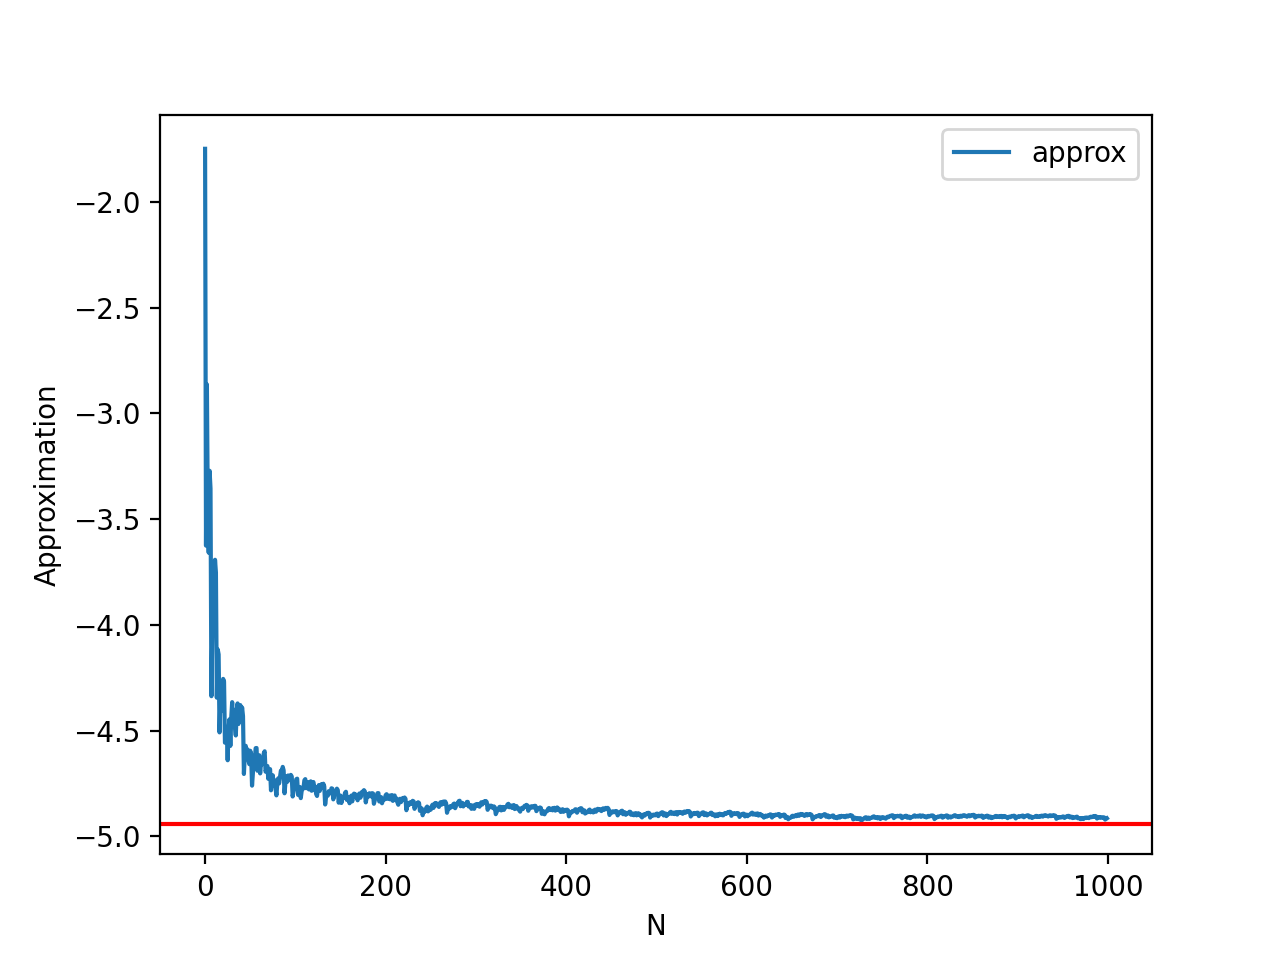

Text(0, 0.5, 'Approximation')

In [21]:
# ingtegrated by hand 
%matplotlib notebook
df['approx'].plot(kind ='line')
plt.axhline(y=intg, color='r', linestyle='-')
plt.legend()
plt.xlabel('N')
plt.ylabel('Approximation')

## Plotting the error with respective to number of terms used

<IPython.core.display.Javascript object>


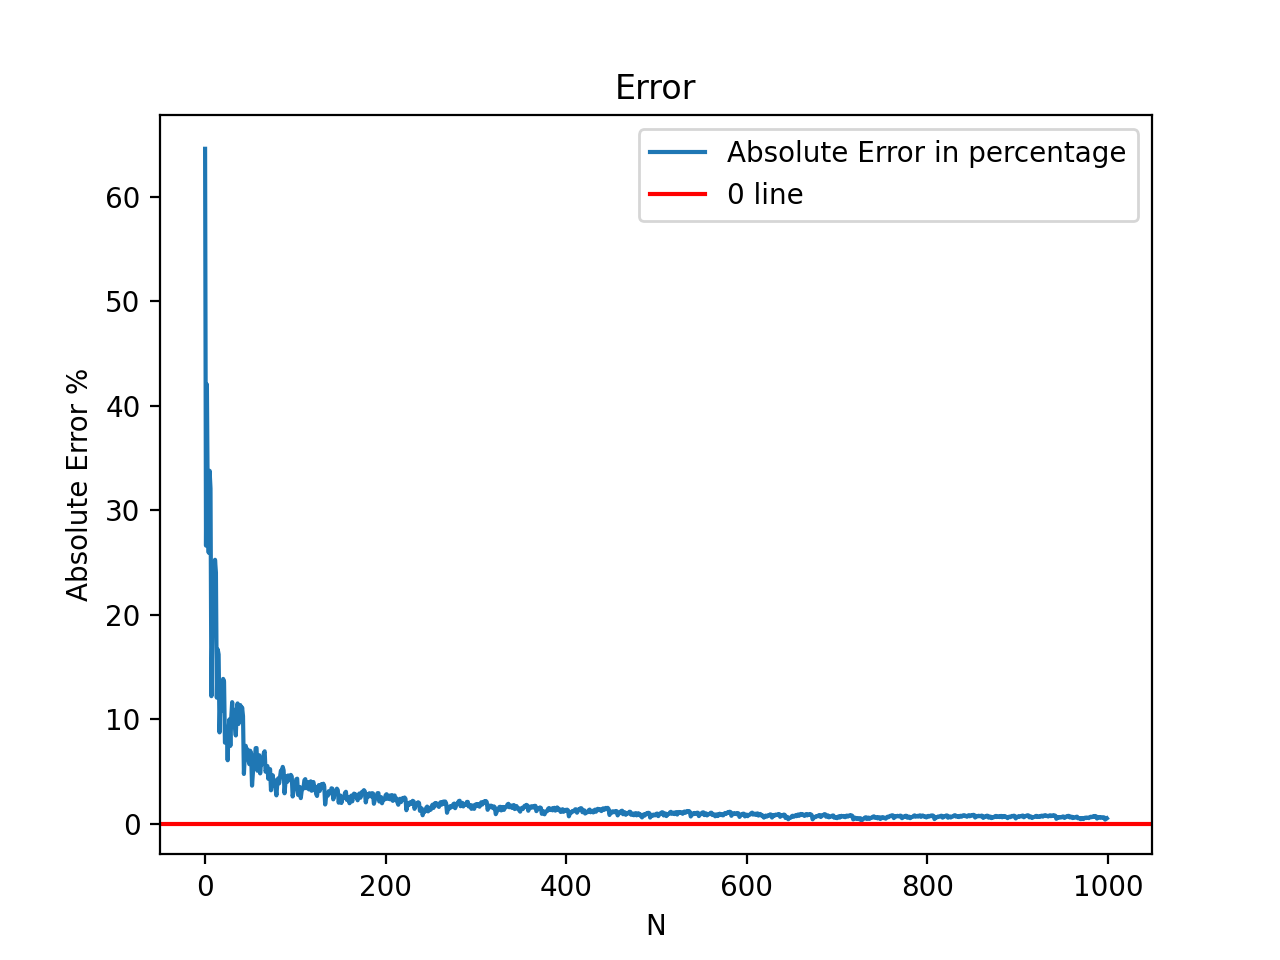

Text(0, 0.5, 'Absolute Error %')

In [27]:
%matplotlib notebook
df['error%'].plot(kind = 'line', title = 'Error')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(['Absolute Error in percentage', '0 line'])
plt.xlabel(r'N')
plt.ylabel('Absolute Error %')


## Setting up table to compare performance of different sequence

In [28]:
df1 = df
df1['phi_7(n)'] = [brifunc(7, n+1) for n in range(1000)]
df1['phi_11(n)'] = [brifunc(11, n+1) for n in range(1000)]
df1['phi_13(n)'] = [brifunc(13, n+1) for n in range(1000)]
df1['phi_17(n)'] = [brifunc(17, n+1) for n in range(1000)]
df1['phi_19(n)'] = [brifunc(19, n+1) for n in range(1000)]
df1['phi_23(n)'] = [brifunc(23, n+1) for n in range(1000)]

df1 = df1.drop(columns  = ['f(x)', 'Cumulative', 'error%', 'approx'])
df1.head(5)

,phi_2(n),phi_3(n),phi_5(n),phi_7(n),phi_11(n),phi_13(n),phi_17(n),phi_19(n),phi_23(n)
0,0.500,0.333333,0.20,0.142857,0.090909,0.076923,0.058824,0.052632,0.043478
1,0.250,0.666667,0.40,0.285714,0.181818,0.153846,0.117647,0.105263,0.086957
2,0.750,0.111111,0.60,0.428571,0.272727,0.230769,0.176471,0.157895,0.130435
3,0.125,0.444444,0.80,0.571429,0.363636,0.307692,0.235294,0.210526,0.173913
4,0.625,0.777778,0.04,0.714286,0.454545,0.384615,0.294118,0.263158,0.217391


In [29]:
df1['f(2,3,5)'] = df['f(x)']
df1['f(3,5,7)'] = f(df['phi_3(n)'], df['phi_5(n)'], df['phi_7(n)'])
df1['f(5,7,11)'] = f(df['phi_5(n)'], df['phi_7(n)'], df['phi_11(n)'])
df1['f(7,11,13)'] = f(df['phi_7(n)'], df['phi_11(n)'], df['phi_13(n)'])
df1['f(11,13,17)'] = f(df['phi_11(n)'], df['phi_13(n)'], df['phi_17(n)'])
df1['f(2, 7, 23)'] = f(df['phi_2(n)'], df['phi_7(n)'], df['phi_23(n)'])
df1.head(5)

,phi_2(n),phi_3(n),phi_5(n),phi_7(n),phi_11(n),phi_13(n),phi_17(n),phi_19(n),phi_23(n),"f(2,3,5)","f(3,5,7)","f(5,7,11)","f(7,11,13)","f(11,13,17)","f(2, 7, 23)"
0,0.500,0.333333,0.20,0.142857,0.090909,0.076923,0.058824,0.052632,0.043478,-1.749007,-1.076523,-0.825970,-0.593285,-0.545486,-0.569510
1,0.250,0.666667,0.40,0.285714,0.181818,0.153846,0.117647,0.105263,0.086957,-5.501997,-2.238573,-1.531497,-1.043699,-0.938281,-1.478809
2,0.750,0.111111,0.60,0.428571,0.272727,0.230769,0.176471,0.157895,0.130435,-1.337480,-5.024989,-2.449832,-1.543330,-1.343716,-1.903258
3,0.125,0.444444,0.80,0.571429,0.363636,0.307692,0.235294,0.210526,0.173913,-5.255972,-8.497588,-3.735986,-2.149359,-1.804647,-3.638476
4,0.625,0.777778,0.04,0.714286,0.454545,0.384615,0.294118,0.263158,0.217391,-4.449697,-1.232764,-6.563895,-2.909804,-2.350799,-4.675025


In [30]:
df1['Cumulative(2,3,5)'] = df1['f(2,3,5)'].cumsum()
df1['Cumulative(3,5,7)'] = df1['f(3,5,7)'].cumsum()
df1['Cumulative(5,7,11)'] = df1['f(5,7,11)'].cumsum()
df1['Cumulative(7,11,13)'] = df1['f(7,11,13)'].cumsum()
df1['Cumulative(11,13,17)'] = df1['f(11,13,17)'].cumsum()
df1['Cumulative(2,7,23)'] = df1['f(2, 7, 23)'].cumsum()
df1.head(5)

,phi_2(n),phi_3(n),phi_5(n),phi_7(n),phi_11(n),phi_13(n),phi_17(n),phi_19(n),phi_23(n),"f(2,3,5)",...,"f(5,7,11)","f(7,11,13)","f(11,13,17)","f(2, 7, 23)","Cumulative(2,3,5)","Cumulative(3,5,7)","Cumulative(5,7,11)","Cumulative(7,11,13)","Cumulative(11,13,17)","Cumulative(2,7,23)"
0,0.500,0.333333,0.20,0.142857,0.090909,0.076923,0.058824,0.052632,0.043478,-1.749007,...,-0.825970,-0.593285,-0.545486,-0.569510,-1.749007,-1.076523,-0.825970,-0.593285,-0.545486,-0.569510
1,0.250,0.666667,0.40,0.285714,0.181818,0.153846,0.117647,0.105263,0.086957,-5.501997,...,-1.531497,-1.043699,-0.938281,-1.478809,-7.251005,-3.315096,-2.357468,-1.636984,-1.483767,-2.048319
2,0.750,0.111111,0.60,0.428571,0.272727,0.230769,0.176471,0.157895,0.130435,-1.337480,...,-2.449832,-1.543330,-1.343716,-1.903258,-8.588484,-8.340085,-4.807300,-3.180314,-2.827483,-3.951577
3,0.125,0.444444,0.80,0.571429,0.363636,0.307692,0.235294,0.210526,0.173913,-5.255972,...,-3.735986,-2.149359,-1.804647,-3.638476,-13.844457,-16.837673,-8.543285,-5.329673,-4.632129,-7.590052
4,0.625,0.777778,0.04,0.714286,0.454545,0.384615,0.294118,0.263158,0.217391,-4.449697,...,-6.563895,-2.909804,-2.350799,-4.675025,-18.294153,-18.070437,-15.107181,-8.239477,-6.982929,-12.265077


In [31]:
df1['approx (2,3,5)'] = df1['Cumulative(2,3,5)'].divide(df1.index.values + 1, axis = 0)
df1['approx (3,5,7)'] = df1['Cumulative(3,5,7)'].divide(df1.index.values + 1, axis = 0)
df1['approx (5,7,11)'] = df1['Cumulative(5,7,11)'].divide(df1.index.values + 1, axis = 0)
df1['approx (7,11,13)'] = df1['Cumulative(7,11,13)'].divide(df1.index.values + 1, axis = 0)
df1['approx (11,13,17)'] = df1['Cumulative(11,13,17)'].divide(df1.index.values + 1, axis = 0)
df1['approx (2,7,23)'] = df1['Cumulative(2,7,23)'].divide(df1.index.values + 1, axis = 0)

df1.head(5)

,phi_2(n),phi_3(n),phi_5(n),phi_7(n),phi_11(n),phi_13(n),phi_17(n),phi_19(n),phi_23(n),"f(2,3,5)",...,"Cumulative(5,7,11)","Cumulative(7,11,13)","Cumulative(11,13,17)","Cumulative(2,7,23)","approx (2,3,5)","approx (3,5,7)","approx (5,7,11)","approx (7,11,13)","approx (11,13,17)","approx (2,7,23)"
0,0.500,0.333333,0.20,0.142857,0.090909,0.076923,0.058824,0.052632,0.043478,-1.749007,...,-0.825970,-0.593285,-0.545486,-0.569510,-1.749007,-1.076523,-0.825970,-0.593285,-0.545486,-0.569510
1,0.250,0.666667,0.40,0.285714,0.181818,0.153846,0.117647,0.105263,0.086957,-5.501997,...,-2.357468,-1.636984,-1.483767,-2.048319,-3.625502,-1.657548,-1.178734,-0.818492,-0.741884,-1.024159
2,0.750,0.111111,0.60,0.428571,0.272727,0.230769,0.176471,0.157895,0.130435,-1.337480,...,-4.807300,-3.180314,-2.827483,-3.951577,-2.862828,-2.780028,-1.602433,-1.060105,-0.942494,-1.317192
3,0.125,0.444444,0.80,0.571429,0.363636,0.307692,0.235294,0.210526,0.173913,-5.255972,...,-8.543285,-5.329673,-4.632129,-7.590052,-3.461114,-4.209418,-2.135821,-1.332418,-1.158032,-1.897513
4,0.625,0.777778,0.04,0.714286,0.454545,0.384615,0.294118,0.263158,0.217391,-4.449697,...,-15.107181,-8.239477,-6.982929,-12.265077,-3.658831,-3.614087,-3.021436,-1.647895,-1.396586,-2.453015


## Approximation comparison between different sequences. 

<IPython.core.display.Javascript object>


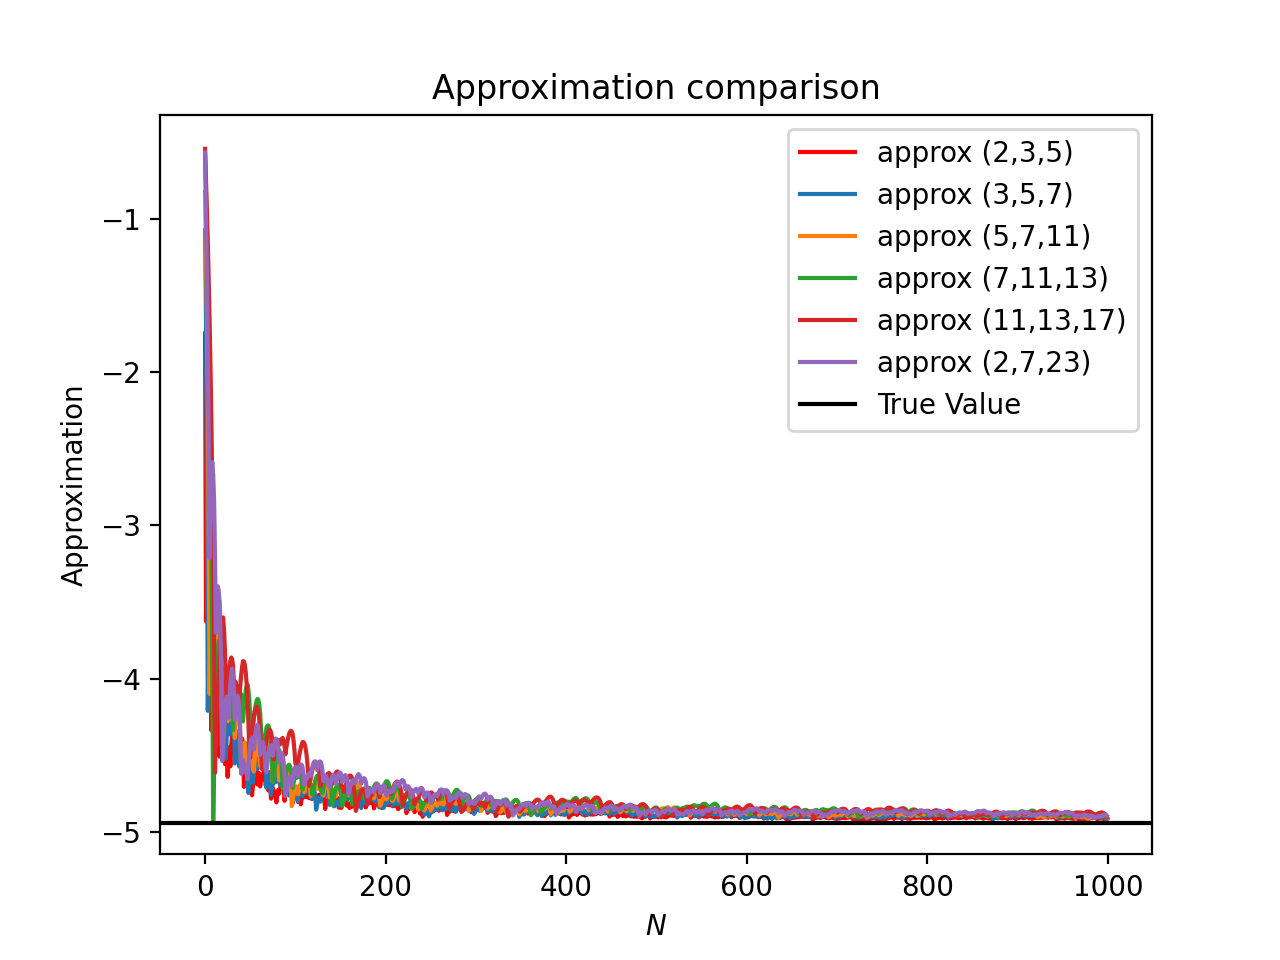

Text(0, 0.5, 'Approximation')

In [42]:
%matplotlib notebook
df1['approx (2,3,5)'].plot(kind = 'line', title = 'approx (2,3,5)', color = 'red')
df1['approx (3,5,7)'].plot(kind = 'line', title = 'approx (3,5,7)') 
df1['approx (5,7,11)'].plot(kind = 'line', title = 'approx (5,7,11)')
df1['approx (7,11,13)'].plot(kind = 'line', title = 'approx (7,11,13)')
df1['approx (11,13,17)'].plot(kind = 'line', title = 'approx (11,13,17)')
df1['approx (2,7,23)'].plot(kind = 'line', title = 'approx (2,7,23)')
plt.axhline(y=intg, color='black', linestyle='-')
plt.title('Approximation comparison')
plt.legend(['approx (2,3,5)', 'approx (3,5,7)', 'approx (5,7,11)', 'approx (7,11,13)', 'approx (11,13,17)', 'approx (2,7,23)', 'True Value'])
plt.xlabel(r'$N$')
plt.ylabel('Approximation')